In [1]:
from IPython.display import Image

# Obtaining OAuth2 credentials

First we want to download some sales data from a google sheet, because the head of sales diligently tracks all their activity there.

## Obtaining OAuth2 credentials from google
#### Why are we doing this? 
Well to access google sheets you have to use a browser and there is a lot of logic happening behind the scenes while you are using google sheets, so even if you were to scrape the entire page, i.e. pull the source HTML code, you would have to do a hell lot of data manipulation with tools like Beautiful Soup, to turn that HTML dump into something useful. I did try this with a public sheet (because this is the only way around the somewhat complicated OAuth process), but the results were a total mess and not worth the effort. But for reference how you would go about it.

In [ ]:
import bs4
import requests
url = 'some google sheets'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text, 'html.parser')

A much easier way of getting data from a google sheet is through the readily available google sheets api, for which there exist very good python libraries like (https://gspread.readthedocs.io/en/latest/oauth2.html). However, they require you to "register", i.e. get OAuth2 credentials.

#### Getting the credentials

1. Head to Google Developers Console (https://console.developers.google.com/project) and create a new project (or select the one you have.)
2. Under “API & auth”, in the API enable “Drive API”.

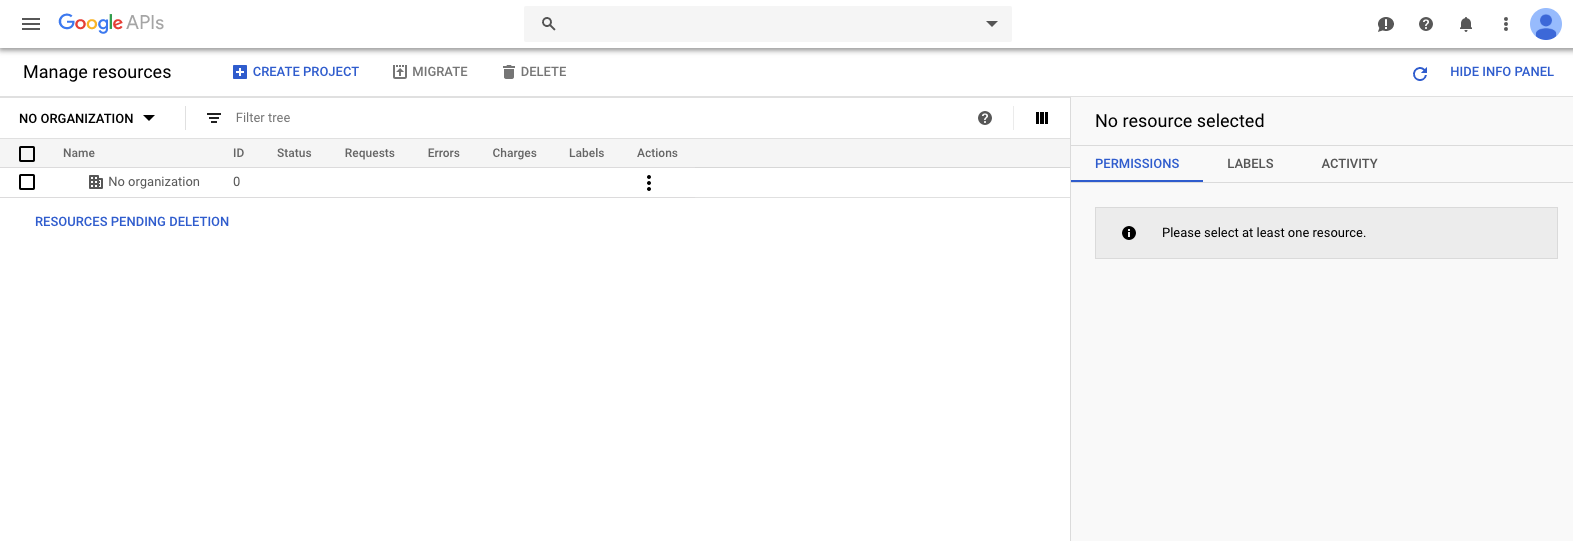

In [2]:
Image('create_project.png')

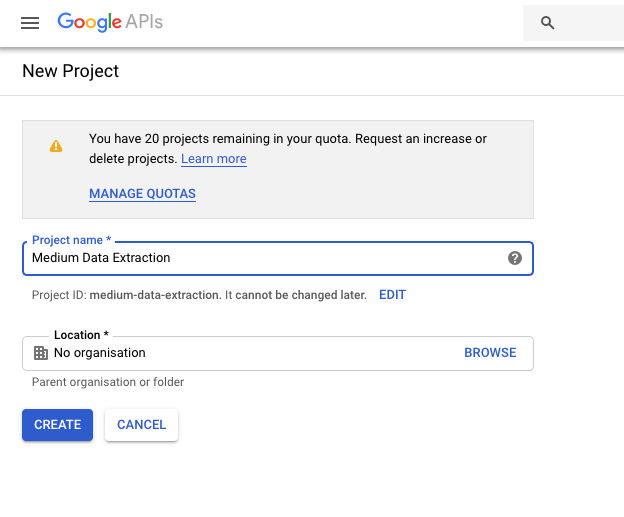

In [3]:
Image('name_project.png')

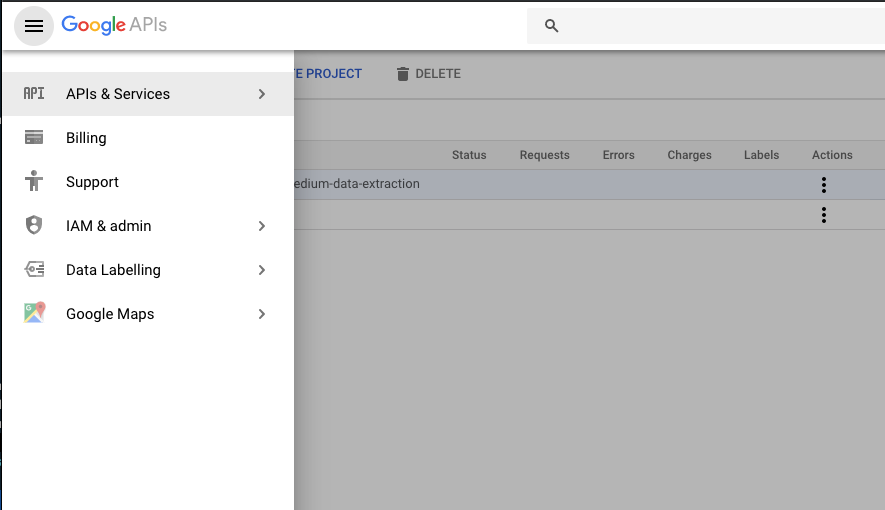

In [9]:
Image('click_api_and_services.png')

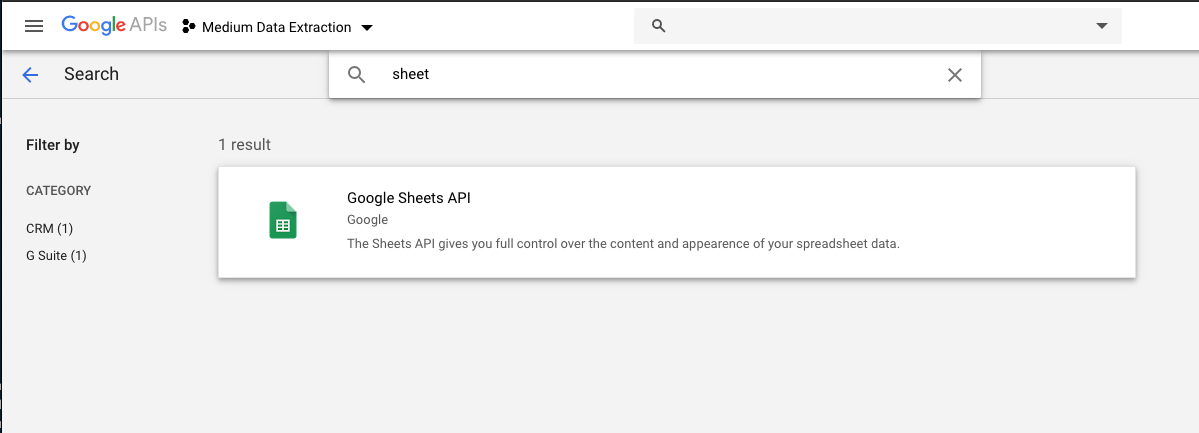

In [10]:
Image('enable_sheets.png')

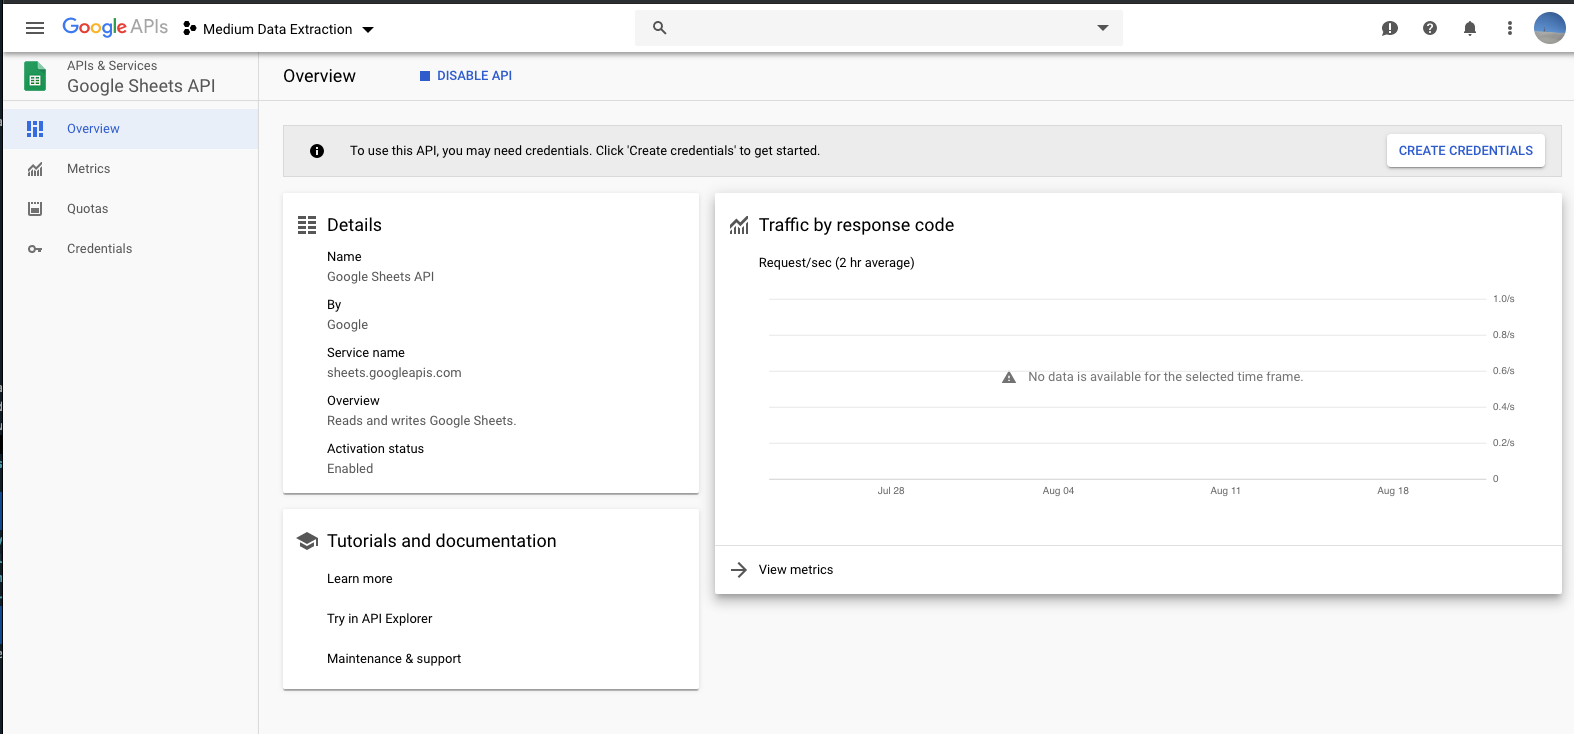

In [11]:
Image('sheets_overview.png')

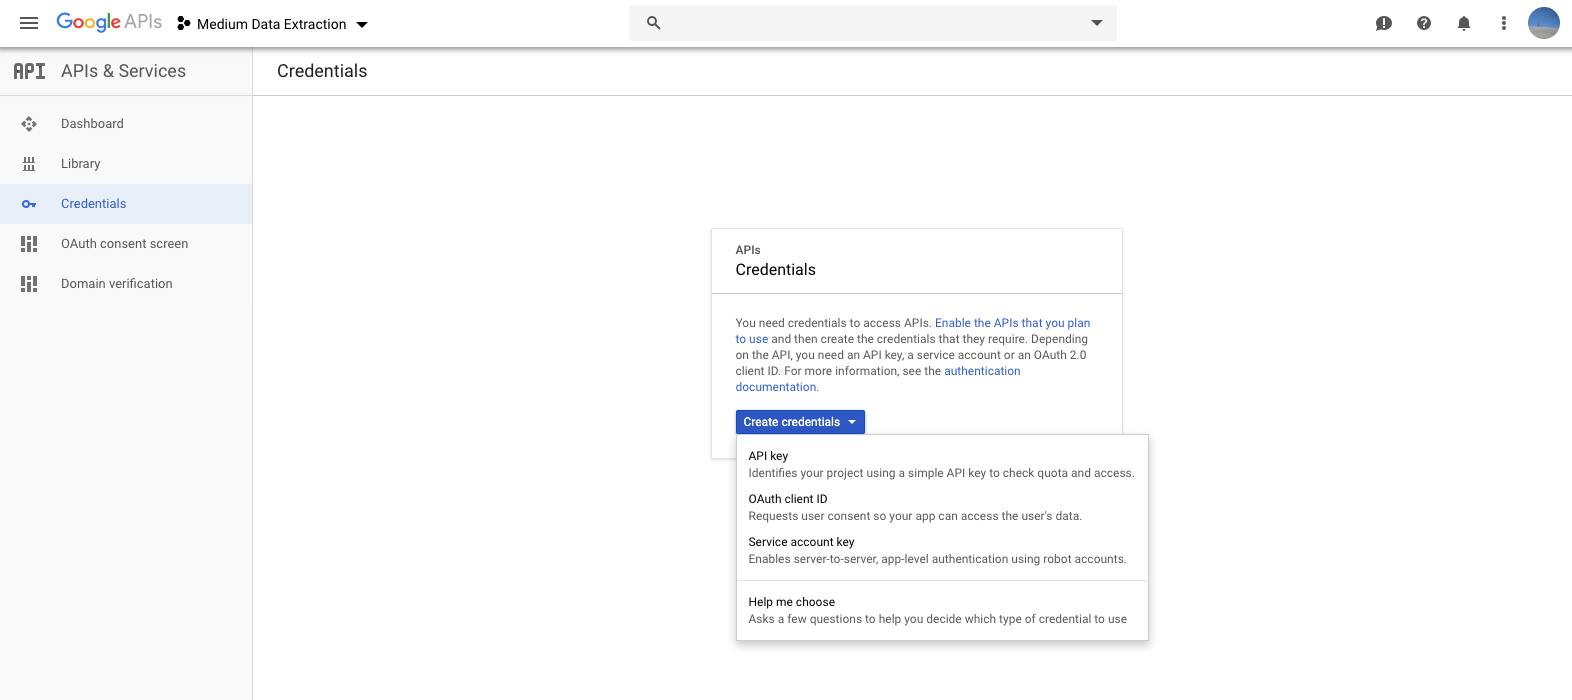

In [12]:
Image('create_service_account.png')

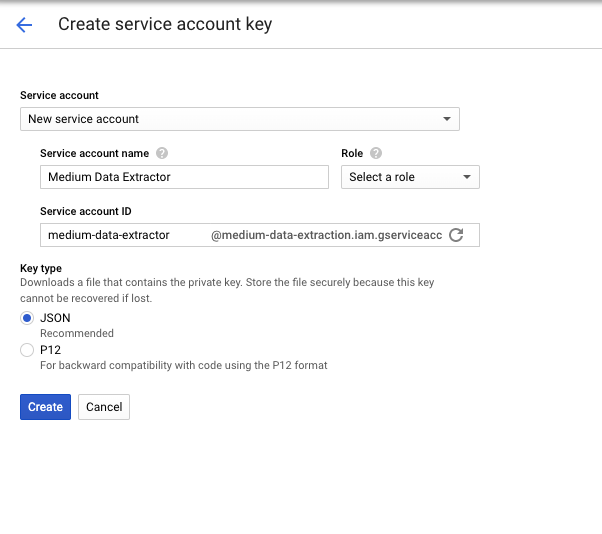

In [16]:
Image('create_json_key.png')

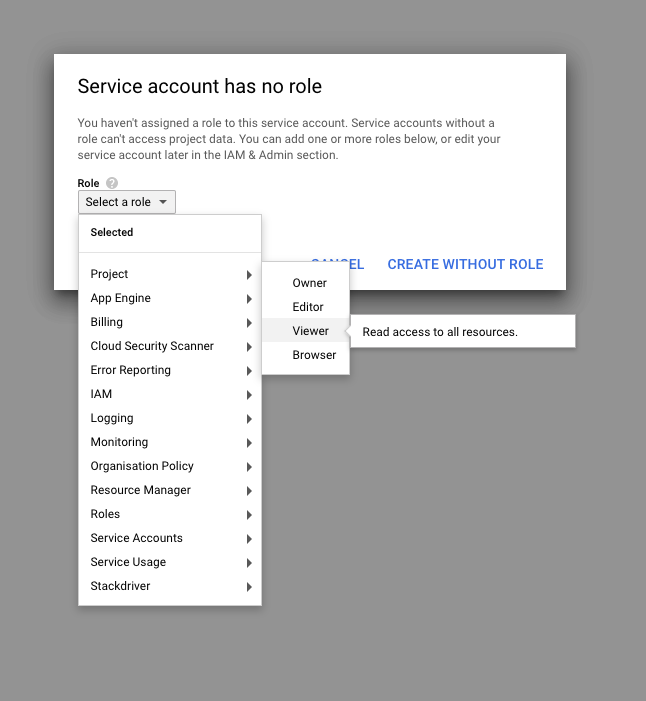

In [17]:
Image('select_service_account_role.png')

The most restrictive setting is viewer. Use that one to just download sheets data, if you also want to create and interact with sheets, use "Editor" (you would then also have to enable the google drive API)

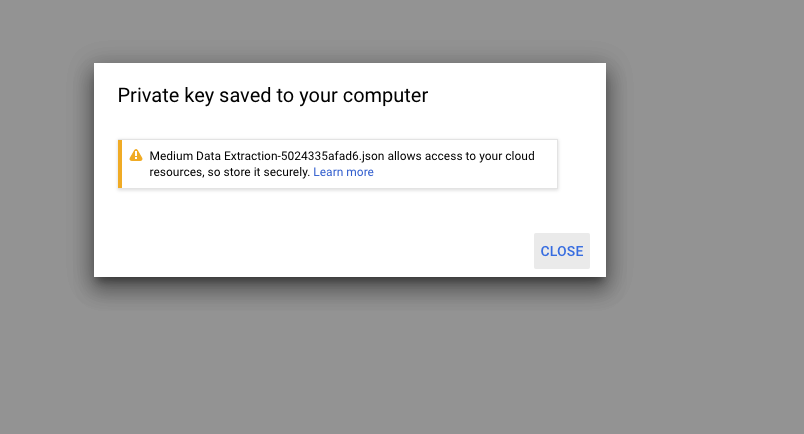

In [18]:
Image('download_key.png')

### Time to install the oauth2client and gspread libraries (uncomment the following) 

In [53]:
#!pip install --upgrade oauth2client
#!pip install gspread

## Download Sheets

In [32]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import pandas as pd

In [45]:
scope = [
    'https://www.googleapis.com/auth/spreadsheets',
]

GOOGLE_KEY_FILE = 'Medium_Data_Extraction_Key.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(GOOGLE_KEY_FILE, scope)
gc = gspread.authorize(credentials)

wokbook_key = '10HX66PbcGDvx6QKM8DC9_zCGp1TD_CZhovGUbtu_M6Y'
workbook = gc.open_by_key(wokbook_key)
sheet = workbook.get_worksheet(0)
values = sheet.get_all_values()
sales_data = pd.DataFrame(values[1:],columns=values[0])

In [36]:
credentials.get_access_token()

AccessTokenInfo(access_token='ya29.c.ElpvBwlwBQLXzFUw97ASCsodQurmzrnxJGS0-hQCYCMOporyQ4FBZiDQJk2RkzPTfQ_uhqattZqMKeYVuTLmtTyi69JfzT3jK5Rz8P4fdX6hwGllpoG6Qk1i6bQ', expires_in=3538)

# Download csv

In [46]:
import requests
url = 'https://raw.githubusercontent.com/FBosler/Medium-Data-Extraction/master/sales_team.csv'
res = requests.get(url, allow_redirects=True)
with open('sales_team.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('sales_team.csv')

In [ ]:
sales_team.head()

### Time to install the openpyxl and xlrd libraries (uncomment the following) 

In [52]:
#!pip install openpyxl
#!pip install xlrd

# Download Excel Data

In [48]:
url = 'https://github.com/FBosler/Medium-Data-Extraction/blob/master/invoices.xlsx?raw=true'
res = requests.get(url, allow_redirects=True)
with open('invoices.xlsx','wb') as file:
    file.write(res.content)
invoices = pd.read_excel('invoices.xlsx')

In [51]:
invoices.head()

,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,DUBEVHKJL58CD5RL,UJWAWDP4T329H04P,2018-07-14 12:00:00,['Lucy Salas'],147
1,6K4UB1OB146J0SDP,UJWAWDP4T329H04P,2014-05-28 09:00:00,['Melissa Rawlings' 'Cedric Pena'],456
2,L7PFX1ZO5XTO1G3O,UJWAWDP4T329H04P,2017-01-14 13:00:00,['Cedric Pena'],16
3,5K7IQ569G82RJ23Y,UJWAWDP4T329H04P,2018-10-04 13:00:00,['Melissa Rawlings'],595
4,BVRM8W1S0RPJ99VC,UJWAWDP4T329H04P,2018-03-31 07:00:00,['Melissa Rawlings'],359
